In [122]:
#SURPRISE TEST SOLUTION DATED 17TH MARCH 2024
#BY - SAYYED MUDASSAR IQBAL SHAKIL AHMED 
#BATCH DSG1023

In [55]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

import pickle


import warnings 
warnings.filterwarnings('ignore')




In [56]:
#Read csv file and convert into dataframe 
data=pd.read_csv('Test_Sales_LinReg.csv')
data.head()


,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [57]:
data.shape

(305, 6)

In [58]:
#understanding data for cleaning
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [59]:
#filling the null values
data['Republic']=data['Republic'].fillna(data['Republic'].mean())

data['NDTV']=data['NDTV'].fillna(data['NDTV'].mean())

data['TV9']=data['TV9'].fillna(data['TV9'].mean())

data['AajTak']=data['AajTak'].fillna(data['Republic'].mean())

In [60]:
#checking if filled
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,25.560895,13.811475
std,85.881799,14.659861,20.290023,21.127576,22.325901,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,37.600000,17.200000
max,296.400000,49.400000,114.000000,114.000000,148.136610,27.000000


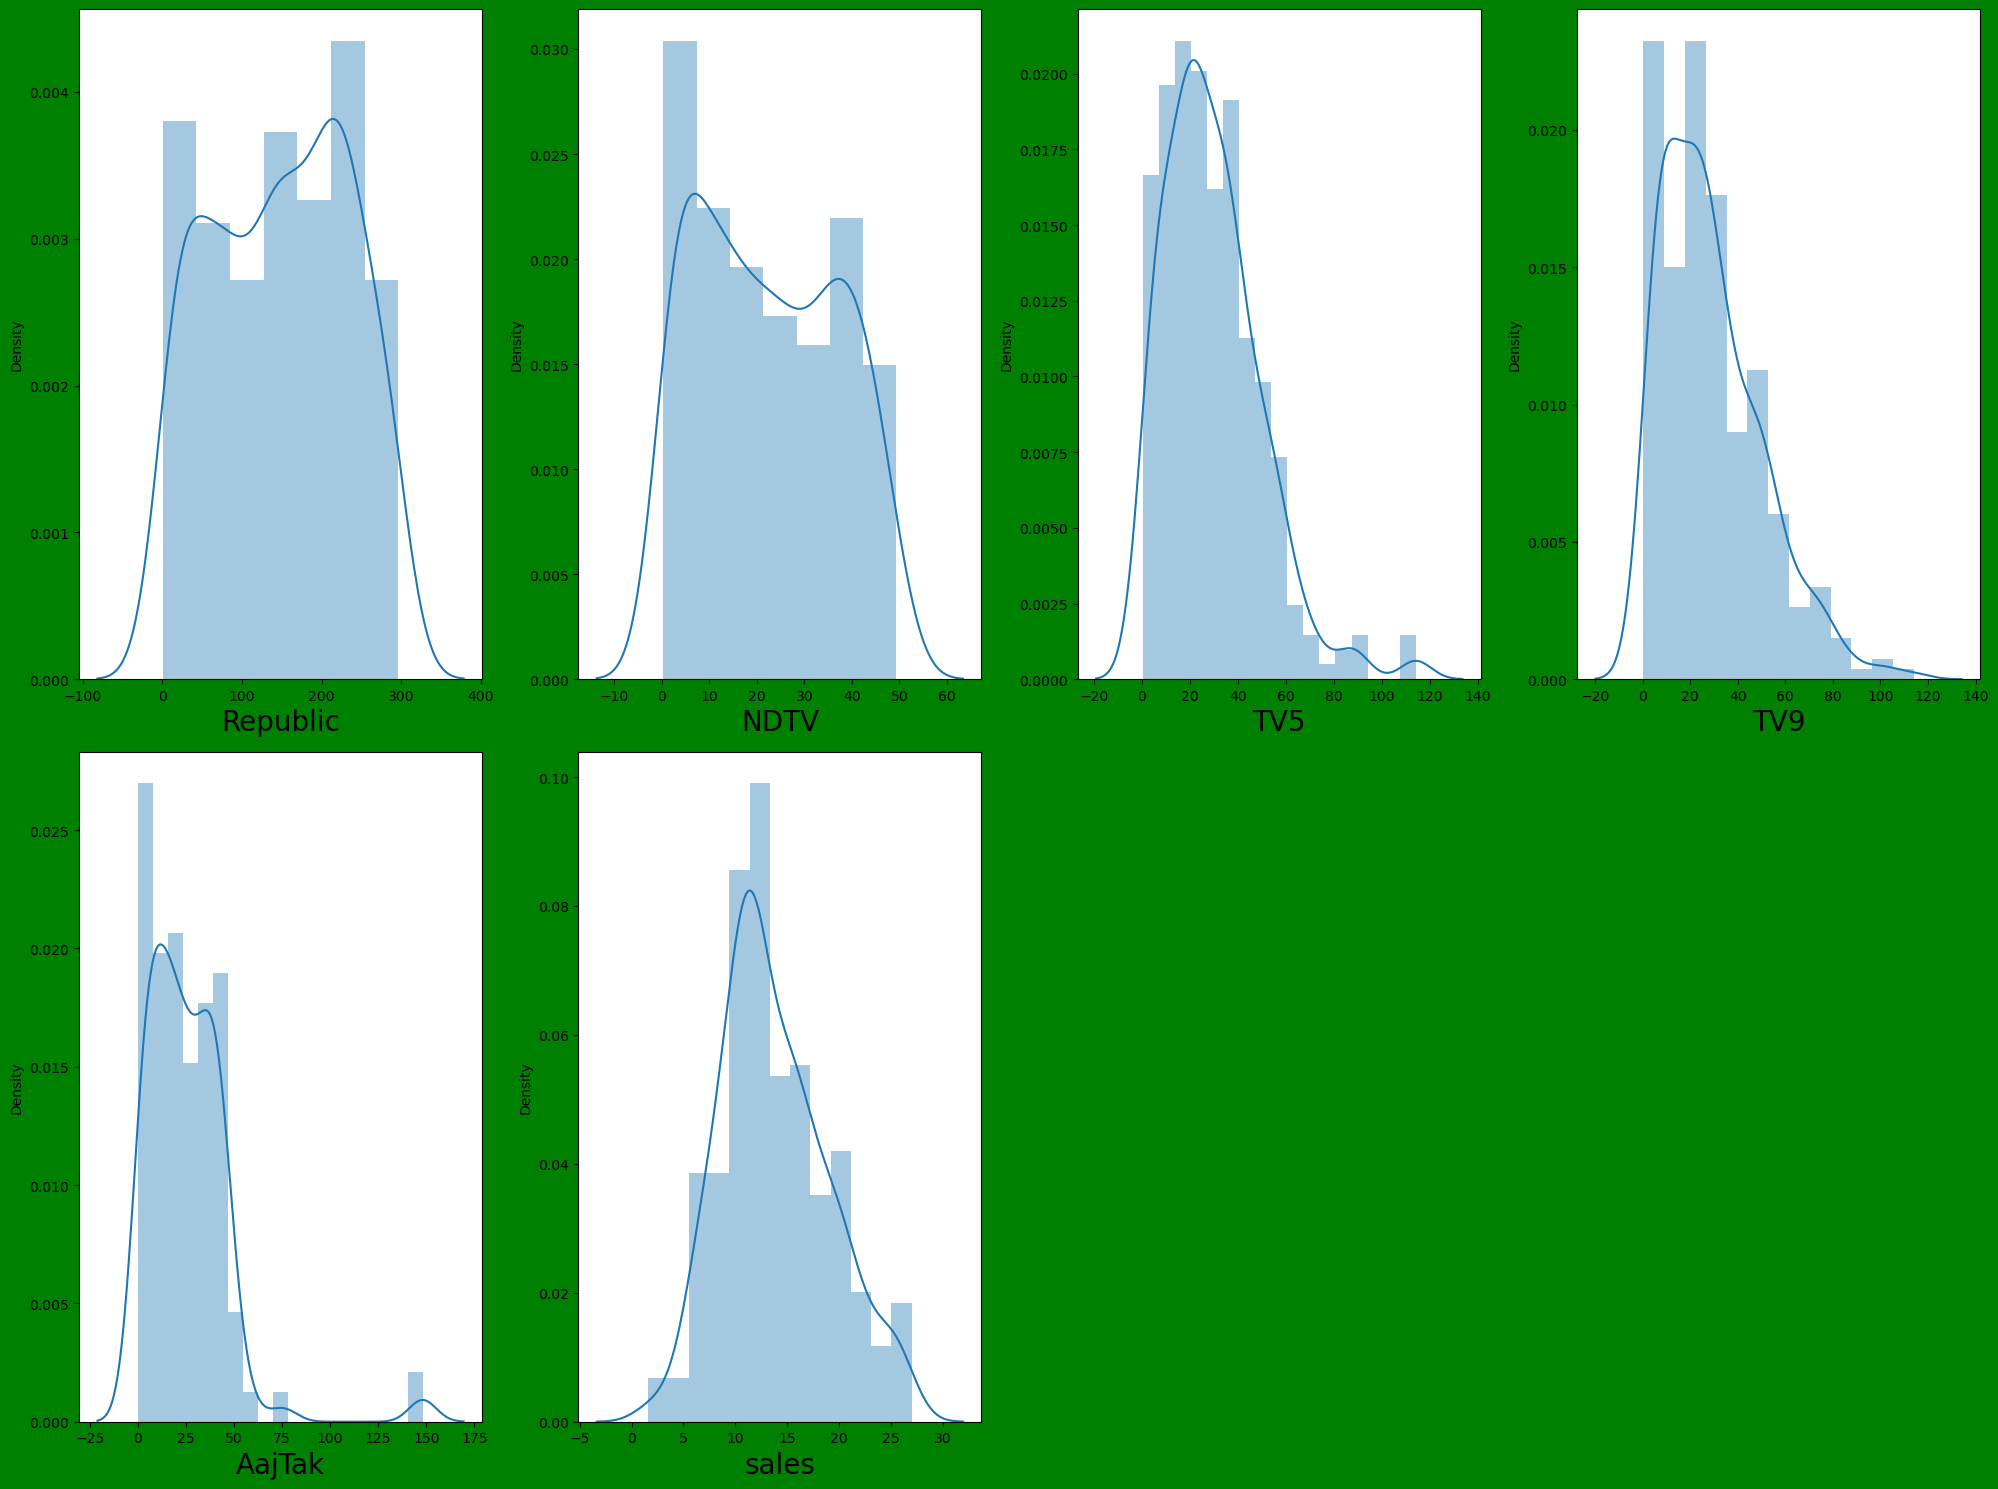

In [61]:
#checking data distribution
plt.figure(figsize=(20,15), facecolor='green')
plotnumber = 1

for column in data:
    if plotnumber<=6:
        ax = plt.subplot(2,4,plotnumber) 
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [62]:
#dividing the dataset into features and label
y=data['sales']
X=data.drop(columns = ['sales'])

In [63]:
X

,Republic,NDTV,TV5,TV9,AajTak
0,8.7,48.9,4.0,75.0,49.0
1,57.5,32.8,65.9,23.5,57.5
2,120.2,19.6,7.2,11.6,18.5
3,8.6,2.1,46.0,1.0,2.6
4,199.8,2.6,52.9,21.2,2.9
...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9
301,18.7,12.1,23.7,23.4,18.7
302,39.5,41.1,17.6,5.8,39.5
303,75.5,10.8,8.3,6.0,75.5


In [64]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

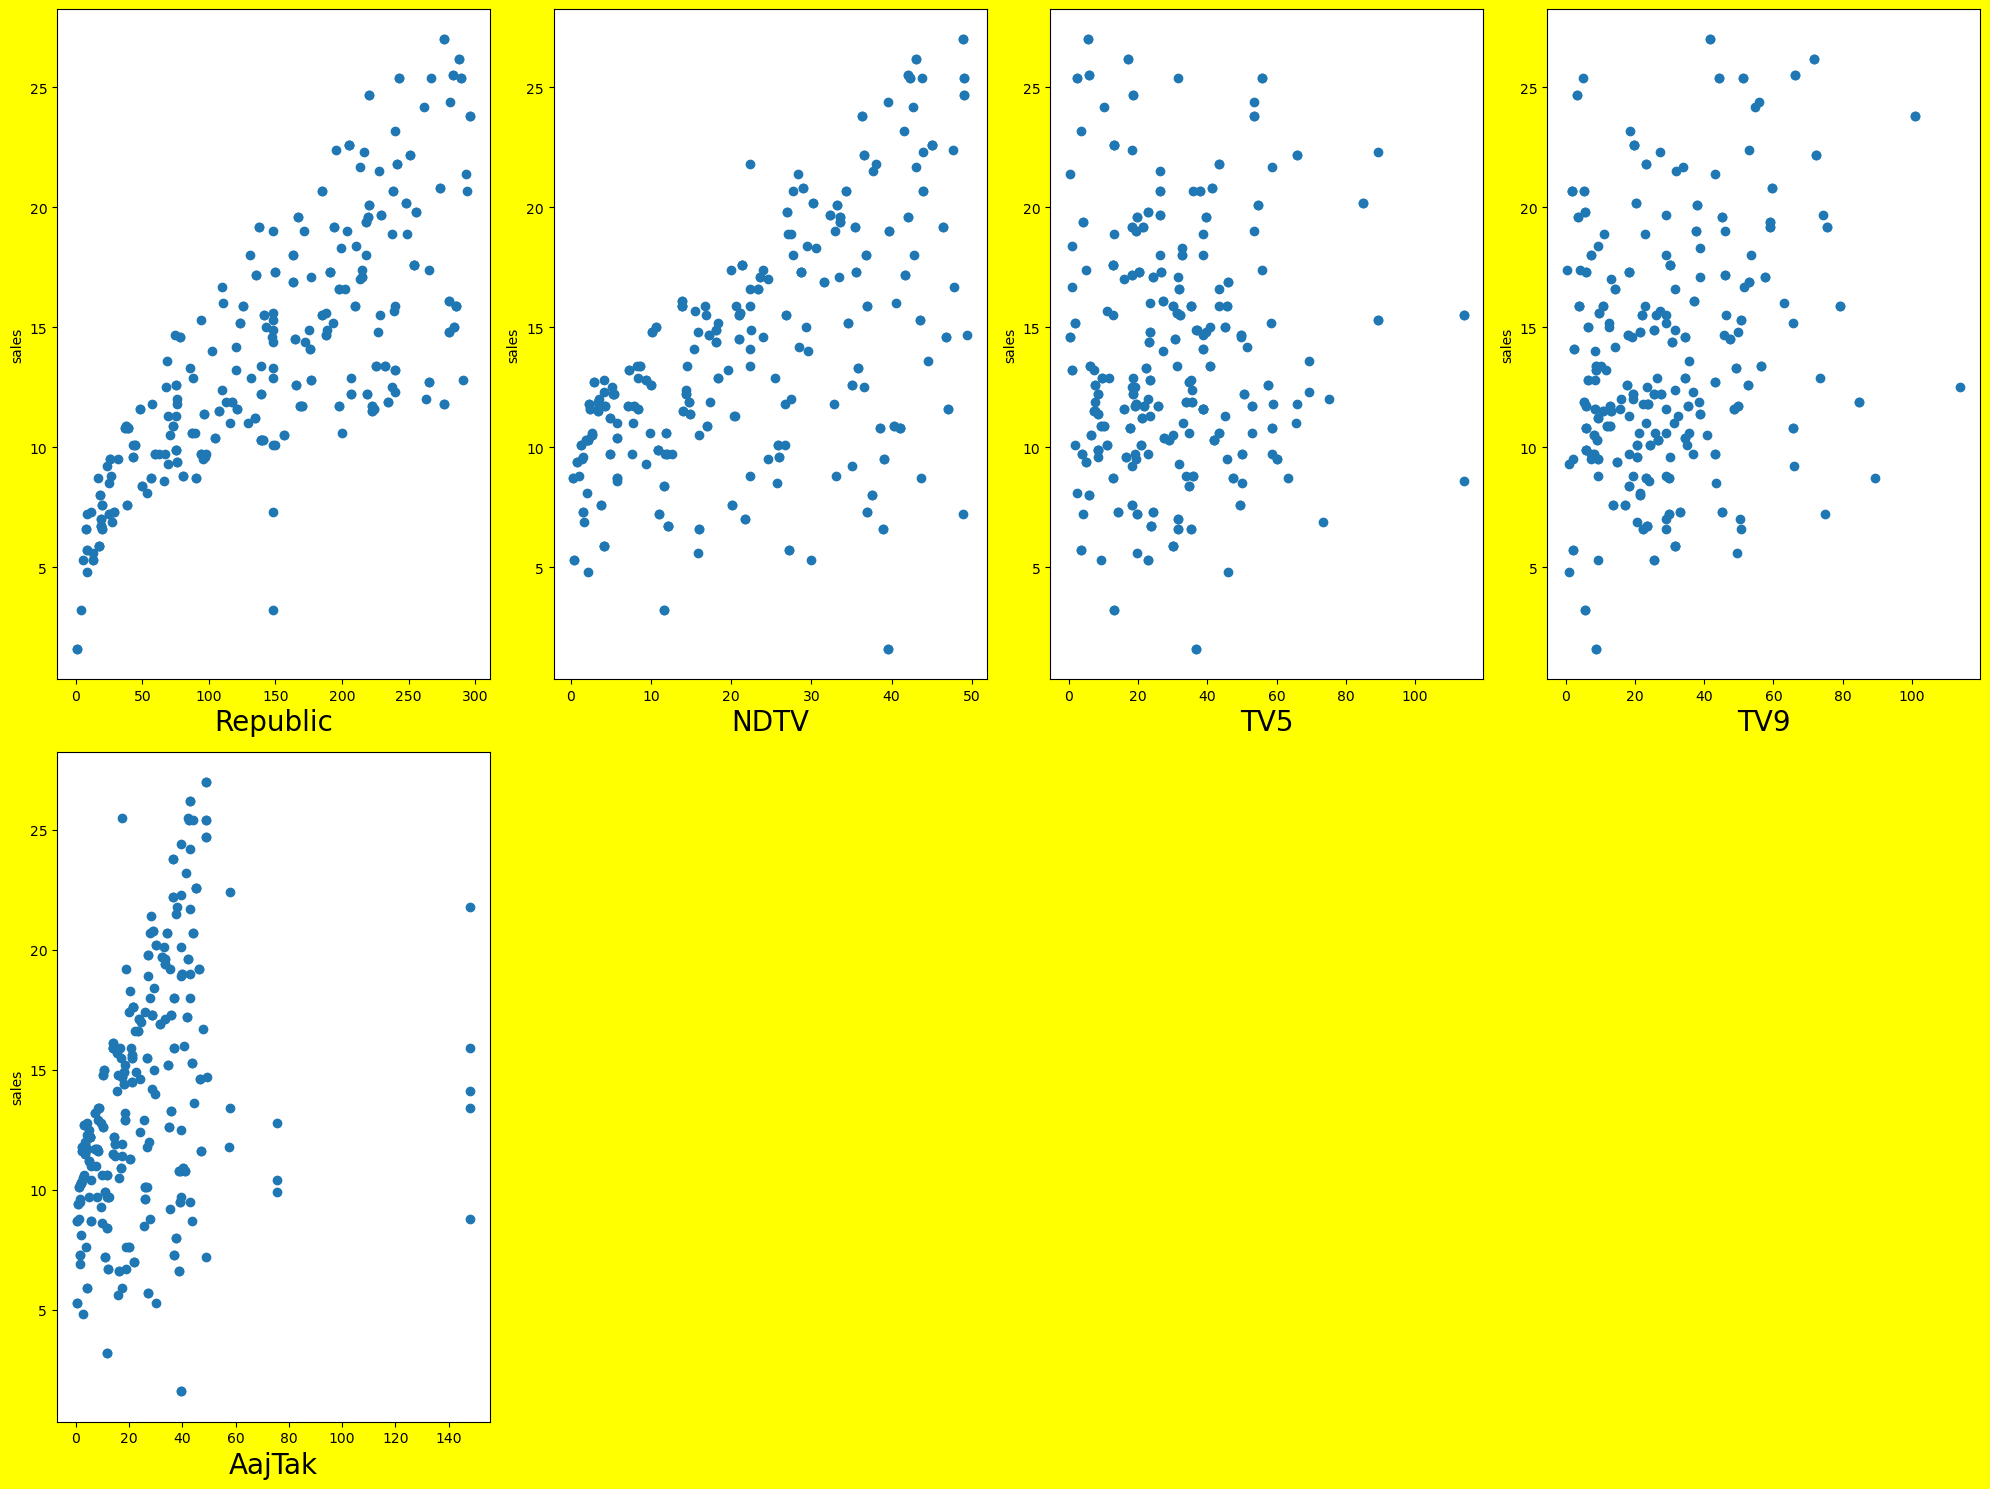

In [65]:
#visualising relationship
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=6:
        ax = plt.subplot(2,4,plotnumber) 
        plt.scatter(X[column],y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('sales',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [94]:
#Feature selection = Selecting all the features


In [95]:
#Scaling our data
scaler =StandardScaler()

X_Scaled = scaler.fit_transform(X)

In [96]:
X_Scaled

array([[-1.62625562,  1.81463603, -1.25683363,  2.18734018,  1.05158685],
       [-1.05709897,  0.71459436,  1.79894035, -0.25423831,  1.43293623],
       [-0.32582597, -0.18730316, -1.09886147, -0.81840887, -0.31678448],
       ...,
       [-1.2670338 ,  1.28169659, -0.58545195, -1.09338276,  0.62537283],
       [-0.84716414, -0.78856818, -1.04455854, -1.0839009 ,  2.24049964],
       [-1.52711973, -1.24634949,  0.02669017,  0.12977695, -0.3751085 ]])

In [97]:
#Performing train test split 
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,y,test_size=0.25,random_state=910)
y_train.head()

253    10.1
5       8.6
33     10.1
62      6.9
21     15.0
Name: sales, dtype: float64

In [98]:
#model initiation and training
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [99]:
#prediction
data.tail(3)

,Republic,NDTV,TV5,TV9,AajTak,sales
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9
304,17.2,4.1,30.0,31.6,17.2,5.9


In [100]:
print('Sales as per last features is : ',regression.predict(scaler.transform([[17.2,4.1,30.0,31.6,17.2]])))

Sales as per last features is :  [4.8619791]


In [101]:
#Saving the model
pickle.dump(regression,open('reg_model','wb'))

In [102]:
#prediction using model
loaded_model=pickle.load(open('reg_model','rb'))

a=loaded_model.predict(scaler.transform([[75.5,10.8,8.3,6.0,75.5]]))

a

array([8.0579724])

In [103]:
#Model evaluation 
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [104]:
y_pred = regression.predict(x_test)

In [105]:
 #MAE

mean_absolute_error(y_test,y_pred)

1.422231658103359

In [106]:
 #MSE

mean_squared_error(y_test,y_pred)

3.272418522723934

In [107]:
 #RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

1.808982731460954

In [108]:
regression.score(x_test,y_test)

0.8925130680562718

In [109]:
#89%


In [110]:
 #now that we have test parameter score, Let's use Lasso and Ridge regression and see how well our data has fitted
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [111]:
lasscv=LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [112]:
alpha=lasscv.alpha_
alpha

0.06676022730411249

In [113]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.06676022730411249)

In [114]:
lasso_reg.score(x_test,y_test)

0.8923346990534441

In [115]:
#again 89% hence no overfit

In [116]:
#Using RidgeCV
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [117]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [118]:
ridgecv.alpha_

0.001

In [119]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [120]:
ridge_model.score(x_test,y_test)

0.8925126031283092

In [121]:
#again 89%, hence proved model is well fitted. 
